Web app that tracks and predicts the location of the ISS

Source: https://www.udemy.com/course/explore-track-and-predict-the-iss-in-realtime-with-python

# Environment Setup

In [ ]:
# !pip install pytrends


In [ ]:
from pytrends.request import TrendReq
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib
from IPython.display import Image


# Code


In [ ]:
# Who is in space right now?

import requests

r = requests.get(url='http://api.open-notify.org/astros.json')
r.json()

{'number': 13,
 'message': 'success',
 'people': [{'name': 'Mark Vande Hei', 'craft': 'ISS'},
  {'name': 'Pyotr Dubrov', 'craft': 'ISS'},
  {'name': 'Anton Shkaplerov', 'craft': 'ISS'},
  {'name': 'Zhai Zhigang', 'craft': 'Shenzhou 13'},
  {'name': 'Wang Yaping', 'craft': 'Shenzhou 13'},
  {'name': 'Ye Guangfu', 'craft': 'Shenzhou 13'},
  {'name': 'Raja Chari', 'craft': 'ISS'},
  {'name': 'Tom Marshburn', 'craft': 'ISS'},
  {'name': 'Kayla Barron', 'craft': 'ISS'},
  {'name': 'Matthias Maurer', 'craft': 'ISS'},
  {'name': 'Oleg Artemyev', 'craft': 'ISS'},
  {'name': 'Denis Matveev', 'craft': 'ISS'},
  {'name': 'Sergey Korsakov.', 'craft': 'ISS'}]}

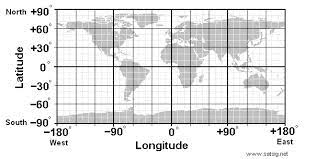

In [ ]:
# http://www.satsig.net/lat_long.htm

Image(filename='satsig_explanation.png',width='60%')

In [ ]:
r = requests.get(url='http://api.open-notify.org/iss-now.json')
space_station_location = (r.json())
print(space_station_location)



{'iss_position': {'longitude': '153.9482', 'latitude': '41.2670'}, 'timestamp': 1647787008, 'message': 'success'}


In [ ]:
space_station_location['iss_position']['latitude']
space_station_location['iss_position']['longitude']
space_station_location['timestamp']

1647787008

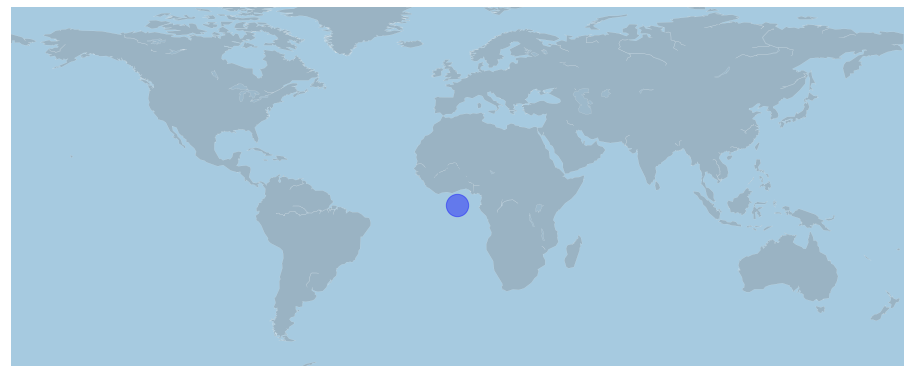

In [ ]:
# plot the ISS' current position
# need to pip install Basemap - https://matplotlib.org/basemap

from mpl_toolkits.basemap import Basemap

# set the dimensions of the figure

plt.figure(figsize=(16,8))

# Make the background map
m = Basemap(llcrnrlon=-180, llcrnrlat=-65, urcrnrlon=180, urcrnrlat=80)
m.drawmapboundary(fill_color = '#A6CAE0',linewidth=0)
m.fillcontinents(color='grey', alpha=0.3)
m.drawcoastlines(linewidth=0.1, color='white')

m.scatter(space_station_location['iss_position']['longitude'],
          space_station_location['iss_position']['latitude'],
          s=500, alpha=0.4,color='blue')

# Collect data over time 

In [ ]:
record_data = True

if record_data == True:
  import datetime
  date_to_print = datetime.datetime.now().strftime("%Y%m%d%H%MS")

  import time
  starttime = time.time()

  space_station_data = []

  while True:
    r = requests.get(url='http://api.open-notify.org/iss-now.json')
    space_station_location = (r.json())
    print(space_station_location)

    space_station_data.append([space_station_location['timestamp'],
                              space_station_location['iss_position']['longitude'],
                              space_station_location['iss_position']['latitude'],
                              ])
    
    #dump copy to file
    tmp_space_station_data_df = pd.DataFrame(space_station_data, columns = ['timestamp', 'latitude','longitude'])
    tmp_space_station_data_df.to_csv('ISS_location_'+ date_to_print + '.csv', index=None)

    #safety break 
    if len(space_station_data) > 18000:
      break
    # let the data collector sleep for 60 seconds
    time.sleep(60.0 - ((time.time() - starttime) % 60.0))



NameError: name 'requests' is not defined

# Visualize the historical datda

In [ ]:
#load historical data
iss_flight_record = pd.read_csv('/work/ISS_location_202203190448S.csv')


#translate timestamp into understandable format

from datetime import datetime
date_time = [datetime.fromtimestamp(dt) for dt in iss_flight_record['timestamp']]

#add a plot size from oldest to newest
iss_flight_record['index'] = range(1,len(iss_flight_record)+1)

iss_flight_record['date'] = date_time
iss_flight_record.head()

iss_flight_record.shape


(582, 5)

In [ ]:
_deepnote_run_altair(iss_flight_record, """{"$schema":"https://vega.github.io/schema/vega-lite/v4.json","mark":{"type":"bar","tooltip":{"content":"data"}},"height":220,"autosize":{"type":"fit"},"data":{"name":"placeholder"},"encoding":{"x":{"field":"timestamp","type":"quantitative","sort":null,"scale":{"type":"linear","zero":false}},"y":{"field":"latitude","type":"quantitative","sort":null,"scale":{"type":"linear","zero":true}},"color":{"field":"","type":"nominal","sort":null,"scale":{"type":"linear","zero":false}}}}""")

alt.Chart(...)

In [ ]:
tmp_space_station_data_df

NameError: name 'tmp_space_station_data_df' is not defined

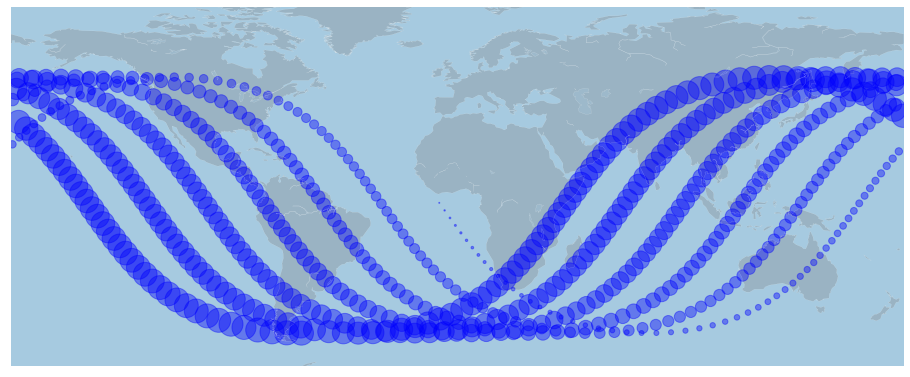

In [ ]:
from mpl_toolkits.basemap import Basemap

#set the dimension of the figure
plt.figure(figsize=(16,8))

#make the background map
m=Basemap(llcrnrlon=-180, llcrnrlat=-65, urcrnrlon=180, urcrnrlat=80)
m.drawmapboundary(fill_color="#A6CAE0", linewidth=0)
m.fillcontinents(color='grey',alpha=0.3)
m.drawcoastlines(linewidth=0.1, color="white")

#overlay a scatterplot of the historical ISS location data
m.scatter(iss_flight_record['latitude'],
        iss_flight_record['longitude'],
        s=iss_flight_record['index'], alpha=0.4, color="blue")

# Predict Location of ISS in the next 10 minutes

In [ ]:
tmp_df = iss_flight_record.tail(10)
tmp_df

,timestamp,latitude,longitude,index,date
572,1647699603,-109.1922,-40.5454,573,2022-03-19 14:20:03
573,1647699663,-105.1676,-42.6866,574,2022-03-19 14:21:03
574,1647699723,-100.8133,-44.6731,575,2022-03-19 14:22:03
575,1647699783,-96.1489,-46.4617,576,2022-03-19 14:23:03
576,1647699843,-91.1723,-48.0256,577,2022-03-19 14:24:03
577,1647699903,-85.9391,-49.3286,578,2022-03-19 14:25:03
578,1647699963,-80.3944,-50.3661,579,2022-03-19 14:26:03
579,1647700023,-74.6294,-51.1035,580,2022-03-19 14:27:03
580,1647700083,-68.7123,-51.5232,581,2022-03-19 14:28:03
581,1647700143,-62.7757,-51.6151,582,2022-03-19 14:29:03


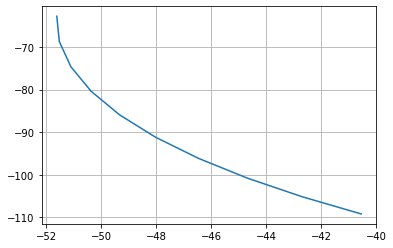

In [ ]:
plt.plot(tmp_df['longitude'],tmp_df['latitude'])
plt.grid()

# Predict Using Linear Regression

In [ ]:
# predict the location of the ISS using linear regression
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(
    x = tmp_df['longitude'],
    y = tmp_df['latitude']
)

print('intercept: ', intercept)
print('slope: ', slope)

intercept:  -269.08804986353
slope:  -3.8123559133936658


In [ ]:
#predict the ISS latitude 1 period out, given a target longitude value

import numpy as np

target_longitude = -40
predicted_latitude = np.ceil(intercept + slope * target_longitude)

print('Next predicted point: ', predicted_latitude)

Next predicted point:  -116.0


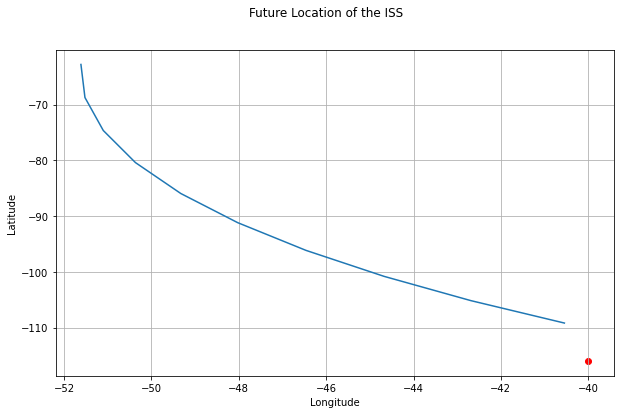

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))

plt.plot(tmp_df['longitude'], tmp_df['latitude'])

plt.suptitle('Future Location of the ISS')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()

plt.scatter([-40],[predicted_latitude], color='red')

# Predict Using Polynomial Regression

In [ ]:
x = tmp_df['longitude']
y = tmp_df['latitude']

#using a 3rd degree polynomial function
poly_regression = np.poly1d(np.polyfit(x,y,3))

predicted_latitude = poly_regression(-40)

print('Next predicted point: ', predicted_latitude)

Next predicted point:  -112.10341376211454


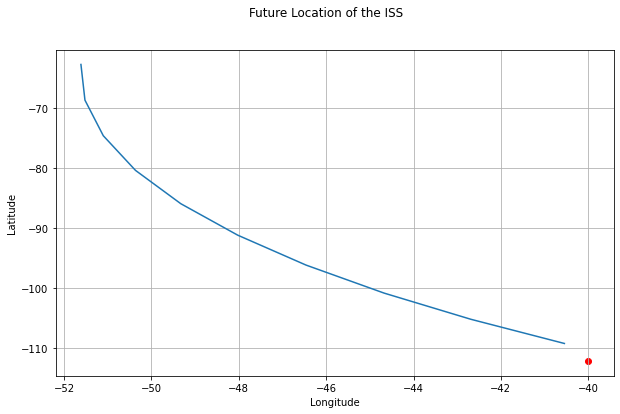

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))

plt.plot(tmp_df['longitude'], tmp_df['latitude'])

plt.suptitle('Future Location of the ISS')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()

plt.scatter([-40],[predicted_latitude], color='red')

In [4]:
!python -m http.server 8080 

Serving HTTP on 0.0.0.0 port 8080 (http://0.0.0.0:8080/) ...
172.3.188.123 - - [20/Mar/2022 15:48:34] "GET / HTTP/1.1" 200 -
172.3.167.43 - - [20/Mar/2022 15:48:35] code 404, message File not found
172.3.167.43 - - [20/Mar/2022 15:48:35] "GET /favicon.ico HTTP/1.1" 404 -
172.3.161.55 - - [20/Mar/2022 15:48:36] "GET /hello.py HTTP/1.1" 200 -
172.3.161.55 - - [20/Mar/2022 15:49:23] "GET / HTTP/1.1" 200 -
^C

Keyboard interrupt received, exiting.


In [9]:
from flask import Flask , escape, request

app = Flask(__name__)

@app.route('/')
def hello():
    name = request.args.get("name","World")
    return f'Hello, {escape(name)}!'


# if __name__ == '__main__':
#     app.run(debug=True)


app.run(host='0.0.0.0', port=8080)

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off
 * Running on all addresses.
 * Running on http://172.3.146.50:8080/ (Press CTRL+C to quit)
172.3.161.55 - - [20/Mar/2022 15:56:02] "GET /?name=Court HTTP/1.1" 200 -
172.3.188.123 - - [20/Mar/2022 15:56:10] "GET /?name=MeMe HTTP/1.1" 200 -
172.3.188.123 - - [20/Mar/2022 15:56:15] "GET /?name=Court HTTP/1.1" 200 -
172.3.161.55 - - [20/Mar/2022 15:56:18] "GET /?name=Court HTTP/1.1" 200 -
172.3.161.55 - - [20/Mar/2022 15:56:23] "GET /?name=MeMe HTTP/1.1" 200 -
172.3.161.55 - - [20/Mar/2022 16:28:15] "GET /?name=MeMe HTTP/1.1" 200 -
172.3.188.123 - - [20/Mar/2022 16:28:22] "GET /?name=MeMe2 HTTP/1.1" 200 -
172.3.188.123 - - [21/Mar/2022 03:38:35] "GET /?name=MeMe2 HTTP/1.1" 200 -
172.3.167.43 - - [21/Mar/2022 14:40:56] "GET /?name=MeMe2 HTTP/1.1" 200 -


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1169c760-db9a-43a0-98b5-bbf4ad1f33cc' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>